In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

In [2]:
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

In [3]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [7]:
# соединим таблицу с рейтингами и названиями фильмов
joined_ratings = ratings.join(movies.set_index('movieId'), on='movieId')

In [8]:
joined_ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


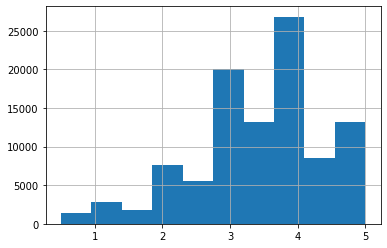

In [9]:
# посмотрим на гистограмму распределения оценок
_ = joined_ratings.rating.hist()

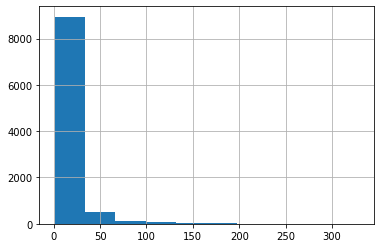

In [10]:
# гистограмма по количеству оценок на фильм
_ = joined_ratings.groupby('title').rating.count().hist()

In [11]:
# достанем топ фильмов по оценкам
top_films = joined_ratings.groupby('title')[['rating']].mean().sort_values('rating', ascending=False)
top_films.head(10)

,rating
title,
Gena the Crocodile (1969),5.0
True Stories (1986),5.0
Cosmic Scrat-tastrophe (2015),5.0
Love and Pigeons (1985),5.0
Red Sorghum (Hong gao liang) (1987),5.0
"Thin Line Between Love and Hate, A (1996)",5.0
Lesson Faust (1994),5.0
Eva (2011),5.0
Who Killed Chea Vichea? (2010),5.0


In [12]:
joined_ratings[joined_ratings['title']=='Who Killed Chea Vichea? (2010)']

,userId,movieId,rating,timestamp,title,genres
71980,462,152711,5.0,1455645862,Who Killed Chea Vichea? (2010),Documentary


In [13]:
# возьмем только фильмы с наивысшей средней оценкой в 5.0
films_with_highest_marks = top_films.iloc[np.where(top_films.rating == 5.0)].index

In [14]:
# достанем по каждому фильму количество рейтингов
title_num_ratings = {}

for title, group in tqdm_notebook(joined_ratings.groupby('title')):
    title_num_ratings[title] = group.userId.unique().shape[0]

/Users/kuznetsovd/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [15]:
# выведем топ фильмов со средней оценкой в 5.0 по количеству отзывов и увидим, что рейтинг получается не самый удачный
sorted([(title_num_ratings[f], f) for f in films_with_highest_marks], key=lambda x: x[0], reverse=True)[:10]

[(2, 'Lesson Faust (1994)'),
 (2, 'Heidi Fleiss: Hollywood Madam (1995)'),
 (2, 'Enter the Void (2009)'),
 (2, 'Lamerica (1994)'),
 (2,
  "Jonah Who Will Be 25 in the Year 2000 (Jonas qui aura 25 ans en l'an 2000) (1976)"),
 (2, 'Come and See (Idi i smotri) (1985)'),
 (2, 'Belle époque (1992)'),
 (1, 'Gena the Crocodile (1969)'),
 (1, 'True Stories (1986)'),
 (1, 'Cosmic Scrat-tastrophe (2015)')]

### Приняли решение сортировать фильмы по следующей метрике: средняя оценка фильма, умноженная на нормированное количество рейтингов

In [16]:
# достанем простые статистики по количеству рейтингов
min_num_ratings = np.min([title_num_ratings[f] for f in title_num_ratings.keys()])
max_num_ratings = np.max([title_num_ratings[f] for f in title_num_ratings.keys()])
mean_num_ratings = np.mean([title_num_ratings[f] for f in title_num_ratings.keys()])
median_num_ratings = np.median([title_num_ratings[f] for f in title_num_ratings.keys()])

In [17]:
print(min_num_ratings)
print(max_num_ratings)
print(mean_num_ratings)
print(median_num_ratings)

1
329
10.374729910484618
3.0


In [21]:
# считаем средний рейтинг на каждый фильм
title_mean_rating = {}

for title, group in tqdm_notebook(joined_ratings.groupby('title')):
    title_mean_rating[title] = group.rating.mean()

/Users/kuznetsovd/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [22]:
film = "Gena the Crocodile (1969)"

In [23]:
title_mean_rating[film]

5.0

In [24]:
title_num_ratings[film]

1

In [25]:
title_mean_rating[film] * (title_num_ratings[film] - min_num_ratings) / (max_num_ratings - min_num_ratings)

0.0

In [26]:
film_with_our_mark = {}

# посчитаем нашу метрику для каждого фильма из датасета
for f in title_num_ratings.keys():
    film_with_our_mark[f] = title_mean_rating[f] * (title_num_ratings[f] - min_num_ratings) / (max_num_ratings - min_num_ratings)

In [27]:
film_with_our_mark_list = [(k,film_with_our_mark[k]) for k in film_with_our_mark.keys()]

In [28]:
title_mean_rating['Forrest Gump (1994)']

4.164133738601824

In [29]:
title_num_ratings['Forrest Gump (1994)']

329

In [30]:
# выводим топ 20 и получилось уже очень неплохо
list(sorted(film_with_our_mark_list, key=lambda x: x[1], reverse=True))[:20]

[('Shawshank Redemption, The (1994)', 4.266984688774333),
 ('Forrest Gump (1994)', 4.164133738601824),
 ('Pulp Fiction (1994)', 3.9155577182807666),
 ('Matrix, The (1999)', 3.5405718108440083),
 ('Silence of the Lambs, The (1991)', 3.526947285601888),
 ('Star Wars: Episode IV - A New Hope (1977)', 3.2249052570206973),
 ('Braveheart (1995)', 2.900818153751158),
 ('Fight Club (1999)', 2.826911781159096),
 ("Schindler's List (1993)", 2.8209603658536584),
 ('Jurassic Park (1993)', 2.7096036585365852),
 ('Terminator 2: Judgment Day (1991)', 2.6997835910278747),
 ('Star Wars: Episode V - The Empire Strikes Back (1980)', 2.6990376835047973),
 ('Usual Suspects, The (1995)', 2.622750777140124),
 ('Toy Story (1995)', 2.5581678956324447),
 ('Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)',
  2.5527210365853654),
 ('American Beauty (1999)', 2.5104988641798185),
 ('Godfather, The (1972)', 2.4975943216463414),
 ('Lord of the Rings: The Fellowship of the Ring, The (200

### Появилась гипотеза использовать теги в ранжировании фильмов, решили считать не только количество отзывов, а ещё и количество проставленных тегов на фильм

In [31]:
# соединим уже созданную таблицу с таблицей с проставленными тегами по фильмам
joined_with_tags = joined_ratings.join(tags.set_index('movieId'), on='movieId', lsuffix='_left', rsuffix='_right')

In [32]:
joined_with_tags.head()

,userId_left,movieId,rating,timestamp_left,title,genres,userId_right,tag,timestamp_right
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336.0,pixar,1.139046e+09
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474.0,pixar,1.137207e+09
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567.0,fun,1.525286e+09
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,289.0,moldy,1.143425e+09
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,289.0,old,1.143425e+09


In [33]:
# достанем по каждому фильму количество рейтингов
title_num_tags = {}

for title, group in tqdm_notebook(joined_with_tags.groupby('title')):
    title_num_tags[title] = group.userId_right.unique().shape[0]

/Users/kuznetsovd/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [49]:
title_num_tags

{"'71 (2014)": 1,
 "'Hellboy': The Seeds of Creation (2004)": 1,
 "'Round Midnight (1986)": 1,
 "'Salem's Lot (2004)": 1,
 "'Til There Was You (1997)": 1,
 "'Tis the Season for Love (2015)": 1,
 "'burbs, The (1989)": 1,
 "'night Mother (1986)": 1,
 '(500) Days of Summer (2009)': 1,
 '*batteries not included (1987)': 1,
 '...All the Marbles (1981)': 1,
 '...And Justice for All (1979)': 1,
 '00 Schneider - Jagd auf Nihil Baxter (1994)': 1,
 '1-900 (06) (1994)': 1,
 '10 (1979)': 1,
 '10 Cent Pistol (2015)': 1,
 '10 Cloverfield Lane (2016)': 1,
 '10 Items or Less (2006)': 1,
 '10 Things I Hate About You (1999)': 1,
 '10 Years (2011)': 1,
 '10,000 BC (2008)': 1,
 '100 Girls (2000)': 1,
 '100 Streets (2016)': 1,
 '101 Dalmatians (1996)': 1,
 '101 Dalmatians (One Hundred and One Dalmatians) (1961)': 1,
 "101 Dalmatians II: Patch's London Adventure (2003)": 1,
 '101 Reykjavik (101 Reykjavík) (2000)': 1,
 '102 Dalmatians (2000)': 1,
 '10th & Wolf (2006)': 1,
 '10th Kingdom, The (2000)': 1,
 '10

In [35]:
min_num_tags = np.min([title_num_tags[f] for f in title_num_tags.keys()])
max_num_tags = np.max([title_num_tags[f] for f in title_num_tags.keys()])
mean_num_tags = np.mean([title_num_tags[f] for f in title_num_tags.keys()])
median_num_tags = np.median([title_num_tags[f] for f in title_num_tags.keys()])

In [50]:
print(min_num_tags)
print(max_num_tags)
print(mean_num_tags)
print(median_num_tags)

1
10
1.0210927050108036
1.0


In [53]:
joined_with_tags[joined_with_tags['title'] == 'Pulp Fiction (1994)'].groupby('userId_right').count()

,userId_left,movieId,rating,timestamp_left,title,genres,tag,timestamp_right
userId_right,,,,,,,,
103.0,921,921,921,921,921,921,921,921
424.0,1228,1228,1228,1228,1228,1228,1228,1228
474.0,307,307,307,307,307,307,307,307
599.0,53111,53111,53111,53111,53111,53111,53111,53111


In [54]:
pf = joined_with_tags[joined_with_tags['title'] == 'Pulp Fiction (1994)']

In [55]:
pf[pf['userId_right'] == 599.0]

,userId_left,movieId,rating,timestamp_left,title,genres,userId_right,tag,timestamp_right
16,1,296,3.0,964982967,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,599.0,1990s,1.498457e+09
16,1,296,3.0,964982967,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,599.0,achronological,1.498456e+09
16,1,296,3.0,964982967,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,599.0,action,1.498456e+09
16,1,296,3.0,964982967,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,599.0,action packed,1.498457e+09
16,1,296,3.0,964982967,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,599.0,aggressive,1.498457e+09
...,...,...,...,...,...,...,...,...,...
99552,610,296,5.0,1479545817,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,599.0,unusual,1.498457e+09
99552,610,296,5.0,1479545817,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,599.0,very funny,1.498456e+09
99552,610,296,5.0,1479545817,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,599.0,violence,1.498456e+09
99552,610,296,5.0,1479545817,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,599.0,violent,1.498456e+09


In [61]:
film_with_new_mark = []

for f in title_num_tags.keys():
    # посчитаем нашу новую метрику для каждого фильма из датасета
    film_with_new_mark.append(
        (f, round(title_mean_rating[f] * (title_num_tags[f] - min_num_tags) / (max_num_tags - min_num_tags), 2)))

In [62]:
# выведем топ фильмов по новой метрике
list(sorted(film_with_new_mark, key=lambda x: x[1], reverse=True))[:20]

[('Star Wars: Episode IV - A New Hope (1977)', 4.23),
 ('Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)',
  1.9),
 ('Eternal Sunshine of the Spotless Mind (2004)', 1.85),
 ('Memento (2000)', 1.83),
 ('Donnie Darko (2001)', 1.77),
 ('Fight Club (1999)', 1.42),
 ("Schindler's List (1993)", 1.41),
 ('Pulp Fiction (1994)', 1.4),
 ('Blade Runner (1982)', 1.37),
 ('Inception (2010)', 1.36),
 ('Anchorman: The Legend of Ron Burgundy (2004)', 1.26),
 ('American History X (1998)', 0.94),
 ('Departed, The (2006)', 0.94),
 ('Forrest Gump (1994)', 0.93),
 ('Matrix, The (1999)', 0.93),
 ('Reservoir Dogs (1992)', 0.93),
 ('City of God (Cidade de Deus) (2002)', 0.92),
 ('Psycho (1960)', 0.9),
 ('Whiplash (2014)', 0.9),
 ('Interstellar (2014)', 0.89)]

## ДЗ

Постройте топ фильмов в категориях Action и Comedy

In [86]:
action_films = joined_with_tags[joined_with_tags['genres'].str.contains(r'Action')]

dict_action_films = {}

for title, group in tqdm_notebook(action_films.groupby('title')):
    dict_action_films[title] = group.userId_right.unique().shape[0]
    
list_action_films = []

for f in dict_action_films.keys():
    list_action_films.append(
        (f, round(title_mean_rating[f] * (dict_action_films[f] - min_num_tags) / (max_num_tags - min_num_tags), 2)))

list(sorted(list_action_films, key=lambda x: x[1], reverse=True))[:20]

/Users/kuznetsovd/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


[('Star Wars: Episode IV - A New Hope (1977)', 4.23),
 ('Fight Club (1999)', 1.42),
 ('Blade Runner (1982)', 1.37),
 ('Inception (2010)', 1.36),
 ('Matrix, The (1999)', 0.93),
 ('City of God (Cidade de Deus) (2002)', 0.92),
 ('Léon: The Professional (a.k.a. The Professional) (Léon) (1994)', 0.89),
 ('Terminator 2: Judgment Day (1991)', 0.88),
 ('Dark Knight, The (2008)', 0.47),
 ('Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)',
  0.47),
 ('Star Wars: Episode V - The Empire Strikes Back (1980)', 0.47),
 ('John Wick: Chapter Two (2017)', 0.46),
 ('Lord of the Rings: The Return of the King, The (2003)', 0.46),
 ('North by Northwest (1959)', 0.46),
 ('Braveheart (1995)', 0.45),
 ('28 Days Later (2002)', 0.44),
 ('Aliens (1986)', 0.44),
 ('Avengers: Infinity War - Part I (2018)', 0.44),
 ('Django Unchained (2012)', 0.44),
 ('Gladiator (2000)', 0.44)]

In [87]:
comedy_films = joined_with_tags[joined_with_tags['genres'].str.contains(r'Comedy')]

dict_comedy_films = {}

for title, group in tqdm_notebook(comedy_films.groupby('title')):
    dict_comedy_films[title] = group.userId_right.unique().shape[0]
    
list_comedy_films = []

for f in dict_comedy_films.keys():
    list_comedy_films.append(
        (f, round(title_mean_rating[f] * (dict_comedy_films[f] - min_num_tags) / (max_num_tags - min_num_tags), 2)))

list(sorted(list_comedy_films, key=lambda x: x[1], reverse=True))[:20]

/Users/kuznetsovd/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


[('Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)',
  1.9),
 ('Pulp Fiction (1994)', 1.4),
 ('Anchorman: The Legend of Ron Burgundy (2004)', 1.26),
 ('Forrest Gump (1994)', 0.93),
 ('Toy Story (1995)', 0.87),
 ('Corpse Bride (2005)', 0.79),
 ('Step Brothers (2008)', 0.79),
 ('Happy Gilmore (1996)', 0.76),
 ('Fargo (1996)', 0.46),
 ('Life Is Beautiful (La Vita è bella) (1997)', 0.46),
 ('Monty Python and the Holy Grail (1975)', 0.46),
 ('Kiss Kiss Bang Bang (2005)', 0.45),
 ('Lost in Translation (2003)', 0.45),
 ('This Is Spinal Tap (1984)', 0.45),
 ('Three Colors: White (Trzy kolory: Bialy) (1994)', 0.45),
 ('Trainspotting (1996)', 0.45),
 ('Big Lebowski, The (1998)', 0.44),
 ('Finding Nemo (2003)', 0.44),
 ('Wolf of Wall Street, The (2013)', 0.44),
 ('Big Hero 6 (2014)', 0.43)]